In [21]:
%load_ext autoreload
%autoreload 2
import pickle
import pandas as pd
%matplotlib inline
from matplotlib.ticker import FuncFormatter 
import matplotlib
import matplotlib.pyplot as plt
import glob
from pdb import set_trace

def ts_plotter(self, ax, data1, data2):
    '''
    Helper for plotting panels in time series plot.
    '''

    out = ax.plot(data1, data2, linewidth=2)
    return out   

df = pd.DataFrame() 
df_r = pd.DataFrame() 
df_dqn = pd.DataFrame()
df_dqn_lr00025_y99 = pd.DataFrame()
df_sc = pd.DataFrame()
df_hum = pd.DataFrame()
df_long = pd.DataFrame()
stats = pd.DataFrame() #for stats

files = glob.glob("../data/random/*.pkl") #random files
for file in files:
    df_r[file.split('/')[3].split('.')[0]] = pickle.load( open( file, "rb" ) )

# files = glob.glob("../data/dqn_vanilla/*.pkl") #vanilla dqn
# for file in files:
#     df_dqn[file.split('/')[3].split('.')[0]] = pickle.load( open( file, "rb" ) )
        
# files = glob.glob("../data/dqn_lr00025/*.pkl") #dqn, lr00025
# for file in files:
#     df_dqn_lr00025[file.split('/')[3].split('.')[0]] = pickle.load( open( file, "rb" ) )

# files = glob.glob("../data/test/*.pkl") #500 steps of DQN
# for file in files:
#     df_long[file.split('/')[3].split('.')[0]] = pickle.load( open( file, "rb" ) )

files = glob.glob("../data/dqn_lr00025_y99/*.pkl") #dqn, lr00025, y = 0.999
for file in files:
    df_dqn_lr00025_y99[file.split('/')[3].split('.')[0]] = pickle.load( open( file, "rb" ) )
    
files = glob.glob("../data/self_class/*.pkl") #self class
for file in files:
     df_sc[file.split('/')[3].split('.')[0]] = pickle.load( open( file, "rb" ) )

files = glob.glob("../data/humans/*.pkl") #humans
for file in files:
    df_hum[file.split('/')[3].split('.')[0]] = pickle.load( open( file, "rb" ) )


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
len(df_sc['self_class_9'])

98

In [22]:
stats['long_m'] = df_long
len(stats)

498

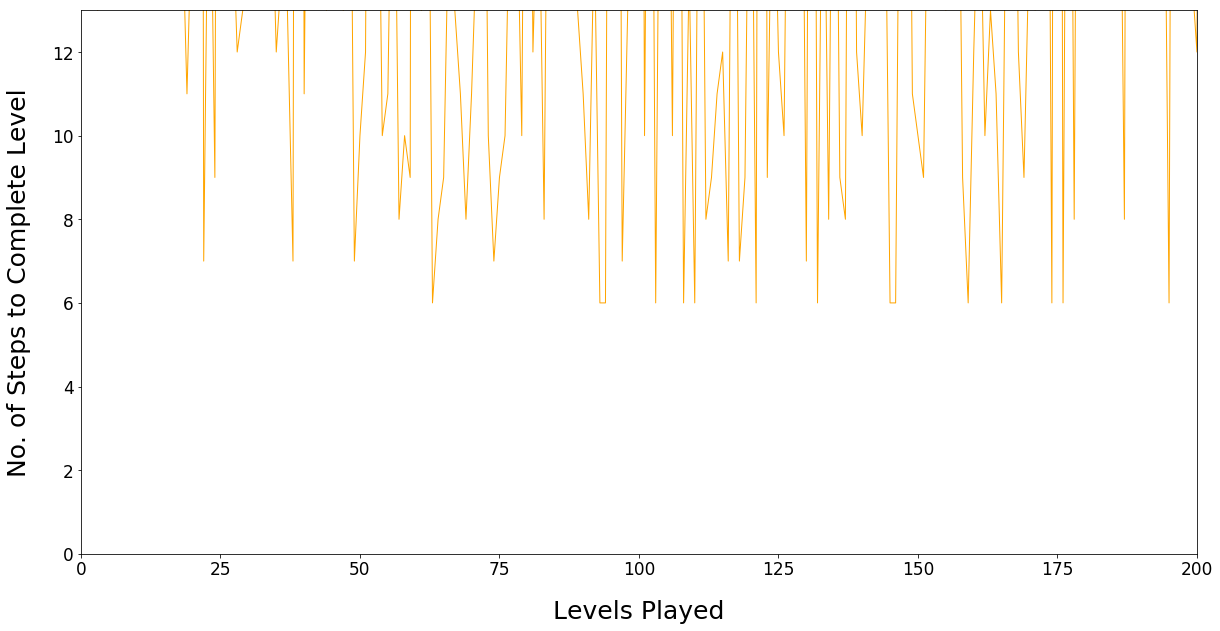

In [27]:
#stats['long_m'] = df_r.mean(axis=1)
#stats['long_se'] = df_r.sem(axis=1)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_ylim([0, 13]) #13 or 150
ax.set_xlim([0, 200]) #13 or 150
ax.xaxis.label.set_size(25)
ax.yaxis.label.set_size(25)
ax.set_xlabel(xlabel="Levels Played", labelpad=21)
ax.set_ylabel(ylabel="No. of Steps to Complete Level", labelpad=21)
ax.tick_params(axis='both', which='major', labelsize=17)

x = [i for i in range(1,499)]
stats['x'] = x

r_l = ax.plot(stats.long_m, color='orange', linewidth=1, label='DQN')
#ax.fill_between(stats.x, stats.long_m - stats.long_se, stats.long_m + stats.long_se, alpha=0.08, color='orange')

In [33]:
sum(stats['long_m'][1:10])

581

In [15]:
len(stats['long_m'])

98

In [46]:
# stats: random
stats['r_m'] = df_r.mean(axis=1)
stats['r_se'] = df_r.sem(axis=1)

# # stats: dqn
# stats['dqn_m'] = df_dqn.mean(axis=1)
# stats['dqn_se'] = df_dqn.sem(axis=1)

# # stats: dqn, lr 0.00025
# stats['dqn_lr00025_m'] = df_dqn_lr00025.mean(axis=1)
# stats['dqn_lr00025_se'] = df_dqn_lr00025.sem(axis=1)

# stats: dqn, lr 0.00025, y = 0.99
stats['dqn_lr00025_y99_m'] = df_dqn_lr00025_y99.mean(axis=1)
stats['dqn_lr00025_y99_se'] = df_dqn_lr00025_y99.sem(axis=1)

# stats: self class
stats['sc_m'] = df_sc.mean(axis=1)
stats['sc_se'] = df_sc.sem(axis=1)

# stats: humans
stats['hum_m'] = df_hum.mean(axis=1)
stats['hum_se'] = df_hum.sem(axis=1)

#x
x = [i for i in range(1,99)]
stats['x'] = x

In [47]:
#run this cell if you want to bin the data
stats = stats.groupby(stats.index // 5).mean().reset_index()
stats['x'] = stats.index

In [1]:
#plt.figure(); df_dqn.plot(subplots=True, figsize=(6, 20), ylim=(0,300)); plt.legend(loc='best')
#df_dqn_m.plot(figsize=(10, 5), ylim=(0,300)); plt.legend(loc='best')
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_ylim([0, 150]) #13 or 150
ax.xaxis.label.set_size(25)
ax.yaxis.label.set_size(25)
ax.set_xlabel(xlabel="Levels Played (Binned Every 5 Levels)", labelpad=21)
ax.set_ylabel(ylabel="No. of Steps to Complete Level", labelpad=21)
ax.tick_params(axis='both', which='major', labelsize=17)

#random
r_l = ax.plot(stats.r_m, color='gray', linewidth=1, label='Random')
#ax.fill_between(stats.x, stats.r_m - stats.r_se, stats.r_m + stats.r_se, alpha=0.08, color='gray')

#dqn, lr 0.00025, y = 0.99
dqn_l = ax.plot(stats.dqn_lr00025_y99_m, color='orange', linewidth=2, label='DQN')
#ax.fill_between(stats.x, stats.dqn_lr00025_y99_m - stats.dqn_lr00025_y99_se, stats.dqn_lr00025_y99_m + stats.dqn_lr00025_y99_se, alpha=0.08, color='orange')

#self class
sc_l = ax.plot(stats.sc_m, color='blue', linewidth=2, label='Self Class')
#ax.fill_between(stats.x, stats.sc_m - stats.sc_se, stats.sc_m + stats.sc_se, alpha=0.08, color='blue')

#human
hum_l = ax.plot(stats.hum_m, color='red', linewidth=2, label='Humans')
#ax.fill_between(stats.x, stats.hum_m - stats.hum_se, stats.hum_m + stats.hum_se, alpha=0.08, color='red')

first_legend = plt.legend(handles=[r_l[0], dqn_l[0], sc_l[0], hum_l[0]], loc='upper right', prop={'size': 22})

fig.savefig('effiency_curves.pdf', format='pdf')

#dqn
#ax.plot(stats.dqn_m)
#ax.fill_between(x, stats.dqn_m - stats.r_se, stats.r_m + stats.r_se, alpha=0.15)

#dqn vanilla
#ax.plot(stats.dqn_lr00025_m, color='green', linewidth=2)
#ax.fill_between(x, stats.dqn_lr00025_m - stats.dqn_lr00025_se, stats.dqn_lr00025_m + stats.dqn_lr00025_se, alpha=0.08, color='green')

NameError: name 'plt' is not defined

In [19]:
# Why is DQN's behavior so awkward

dqn_singleAgent = [0, 35, 73, 18, 49, 104, 52, 17, 17, 39, 166, 31, 68, 47, 162, 14, 53, 296, 88, 52, 18, 49, 33, 98, 57, 42, 81, 57, 24, 58, 63, 7, 28, 32, 75, 101, 79, 45, 66, 39, 55, 157, 171, 43, 73, 27, 95, 172, 304, 74, 98, 15, 13, 14, 10, 154, 87, 51, 48, 89, 62, 28, 50, 100, 9, 56, 45, 118, 52, 54, 128, 103, 12, 137, 49, 178, 55, 11, 13, 197, 87, 27, 318, 41, 183, 36, 62, 61, 313, 39, 40, 175, 62, 77, 111, 130, 108, 102, 92, 101, 133, 63, 64, 113, 77, 111, 61, 146, 46]
dqn_singleAgent = dqn_singleAgent[1:99]

with open('/Users/julian/Documents/github/juliandefreitas/probabilistic_self2/data/test/dqn_singleAgent_changeLocations.pkl', 'wb') as f:
    pickle.dump(dqn_singleAgent, f)

In [30]:
individual_dqns.columns

Index(['index', 'dqn_training_2_lr_0', 'dqn_training_8_lr_0',
       'dqn_training_5_lr_0', 'dqn_training_6_lr_0', 'dqn_training_1_lr_0',
       'dqn_training_7_lr_0', 'dqn_training_4_lr_0', 'dqn_training_9_lr_0',
       'dqn_training_3_lr_0', 'dqn_training_10_lr_0'],
      dtype='object')

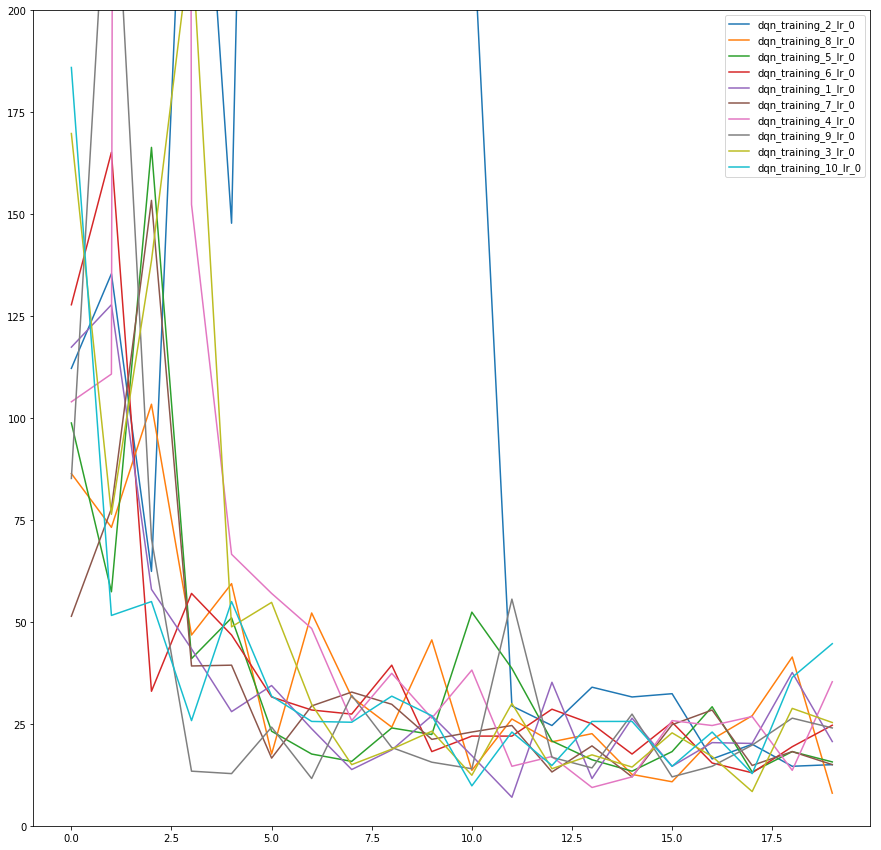

In [35]:
individual_dqns = df_dqn_lr00025_y99.groupby(df_dqn_lr00025_y99.index // 5).mean().reset_index()
individual_dqns = individual_dqns.drop(['index'], axis=1)
individual_dqns.plot(ylim=[0,200], figsize=[15,15])